In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PIL

In [3]:
os.listdir('../input/landmark-recognition-2020/')

['sample_submission.csv', 'test', 'train', 'train.csv']

In [6]:
BASE_PATH = '../input/landmark-recognition-2020'

TRAIN_DIR = f'{BASE_PATH}/train'
TEST_DIR = f'{BASE_PATH}/test'

print('Reading data...')
train = pd.read_csv(f'{BASE_PATH}/train.csv')
submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
print('Reading data completed')

Reading data...
Reading data completed


In [7]:
display(train.head())
print("Shape of train_data :", train.shape)

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


Shape of train_data : (1580470, 2)


In [9]:
import plotly.express as px

In [10]:
landmark = train.landmark_id.value_counts()
landmark_df = pd.DataFrame({'landmark_id':landmark.index, 'frequency':landmark.values}).head(30)

landmark_df['landmark_id'] =   landmark_df.landmark_id.apply(lambda x: f'landmark_id_{x}')

fig = px.bar(landmark_df, x="frequency", y="landmark_id",color='landmark_id', orientation='h',
             hover_data=["landmark_id", "frequency"],
             height=1000,
             title='Number of images per landmark_id (Top 30 landmark_ids)')
fig.show()

In [11]:
missing = train.isnull().sum()
all_val = train.count()

missing_train = pd.concat([missing, all_val], axis=1, keys=['Missing', 'AllObservations'])
missing_train

,Missing,AllObservations
id,0,1580470
landmark_id,0,1580470


In [13]:
import seaborn as sns

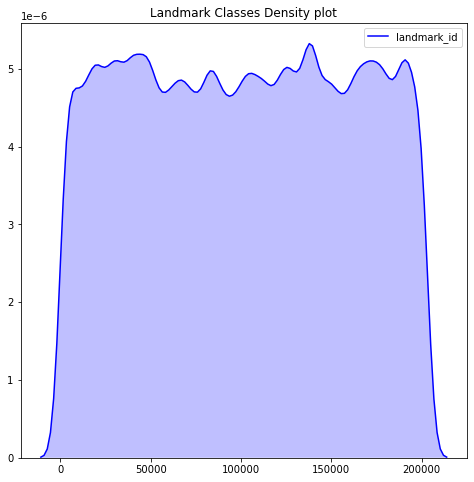

In [14]:
plt.figure(figsize = (8, 8))
plt.title('Landmark Classes Density plot')
sns.kdeplot(train['landmark_id'], color="blue", shade=True)
plt.show()

Text(0.5, 1.0, 'Number of images for each landmark category')

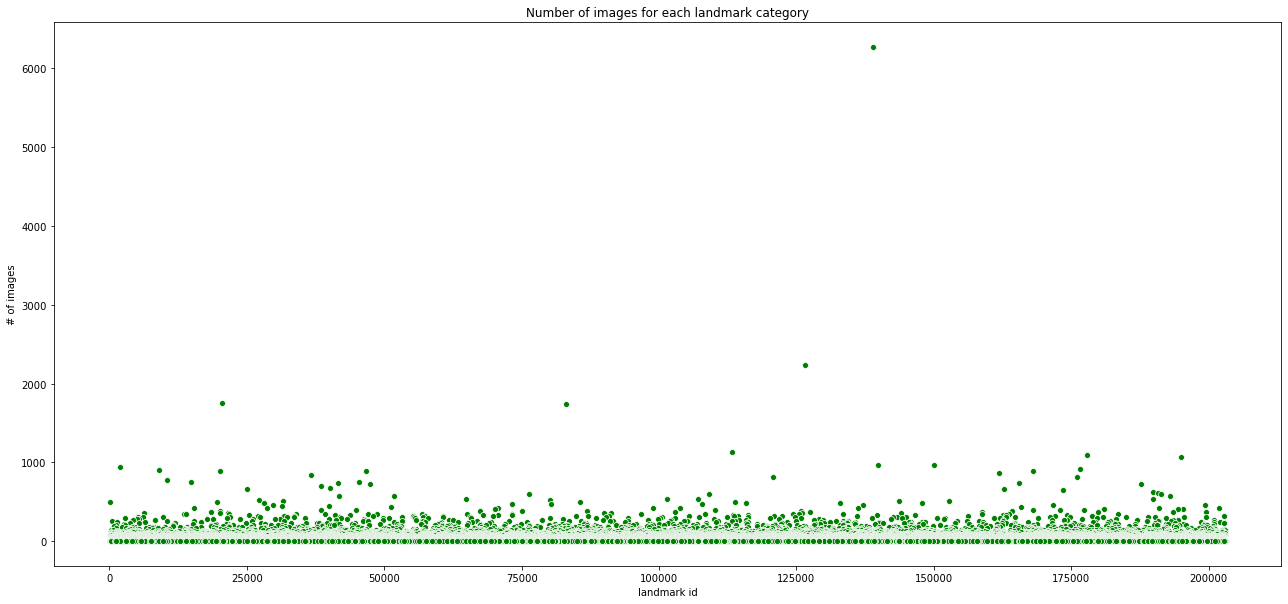

In [31]:
# frequency count distribution plot.

temp = train.landmark_id.value_counts().to_frame()
temp.reset_index(inplace=True)
temp.columns=['landmark_id','count']

plt.figure(figsize=(22,10))
sns.scatterplot(x='landmark_id', y='count', data=temp, color = 'green')
plt.ylabel('# of images')
plt.xlabel('landmark id')
plt.title('Number of images for each landmark category')

In [34]:
train_dir = '../input/landmark-recognition-2020/train/'
test_dir = '../input/landmark-recognition-2020/test/'

In [36]:
from PIL import Image

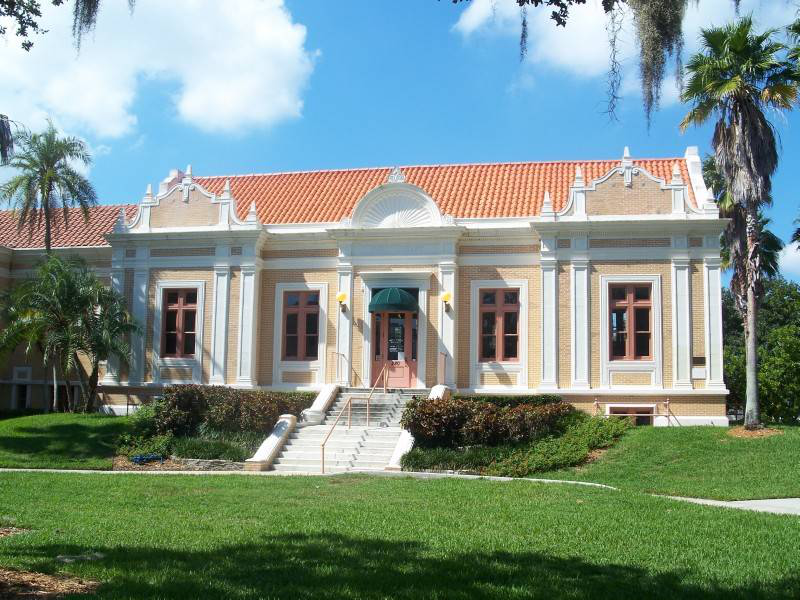

In [37]:
# printing sample image.

image = Image.open('../input/landmark-recognition-2020/train/0/0/0/000014b1f770f640.jpg')
image

In [38]:
landmarks = pd.read_csv('../input/landmark-recognition-2020/train.csv')
landmarks.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [39]:
landmarks["landmark_id"].nunique()

81313

In [40]:
# checking frequency of all the unique landmark_id.

count = pd.DataFrame(landmarks["landmark_id"].value_counts())
count.head()

,landmark_id
138982,6272
126637,2231
20409,1758
83144,1741
113209,1135


In [41]:
count["landmark"] = count.index
count = count.rename(columns = {'landmark_id': 'freq'},inplace = False)
# print(count.shape)
count.head()

,freq,landmark
138982,6272,138982
126637,2231,126637
20409,1758,20409
83144,1741,83144
113209,1135,113209


In [42]:
# print(count.shape)
# count.head()

In [51]:
# selecting all the landmarks with the frequency count greater 50.

count = count[count["freq"] > 50]
count = count[count["freq"]<2000]
count["freq"]<2000
count.head()
print(count.shape)

(6330, 2)


In [44]:
count["freq"].sum()

666579

In [45]:
# printing all the left-over landmark ids.

list(count["landmark"])

[138982,
 126637,
 20409,
 83144,
 113209,
 177870,
 194914,
 149980,
 139894,
 1924,
 176528,
 9070,
 20120,
 46705,
 168098,
 161902,
 36748,
 176018,
 120734,
 10419,
 45428,
 14915,
 41648,
 165596,
 47378,
 187779,
 38482,
 40088,
 25093,
 162833,
 173511,
 189907,
 190822,
 76303,
 191292,
 109169,
 51856,
 192931,
 41808,
 107164,
 189811,
 101399,
 64792,
 80177,
 27190,
 152708,
 143710,
 31531,
 27,
 113838,
 85633,
 19605,
 28139,
 132969,
 115821,
 147897,
 73300,
 107801,
 80272,
 29794,
 171683,
 199450,
 137203,
 39865,
 31361,
 51272,
 165900,
 15445,
 190956,
 201840,
 98993,
 136302,
 70644,
 103899,
 28641,
 195412,
 180901,
 70088,
 194406,
 38494,
 172929,
 110153,
 44939,
 168106,
 177409,
 67406,
 75005,
 164191,
 20064,
 86869,
 125786,
 199506,
 127516,
 193550,
 18392,
 179959,
 102850,
 158818,
 6208,
 144036,
 21635,
 91274,
 90021,
 20102,
 126100,
 125425,
 183531,
 65068,
 108327,
 13471,
 158844,
 73211,
 21703,
 47133,
 124455,
 13866,
 133454,
 39209,


In [52]:
landmarks = landmarks[landmarks["landmark_id"].isin(list(count["landmark"]))]
landmarks.head()

,id,landmark_id
0,00cba0067c078490,27
1,00f928e383e1d121,27
2,0110a04e618bc368,27
3,026afdc670937e3b,27
4,0319627771784e54,27


In [53]:
landmarks = landmarks.reset_index(drop=True)
landmarks.head()

,id,landmark_id
0,00cba0067c078490,27
1,00f928e383e1d121,27
2,0110a04e618bc368,27
3,026afdc670937e3b,27
4,0319627771784e54,27


In [54]:
landmarks.shape

(658076, 2)

Text(0.5, 1.0, 'Number of images for each landmark category')

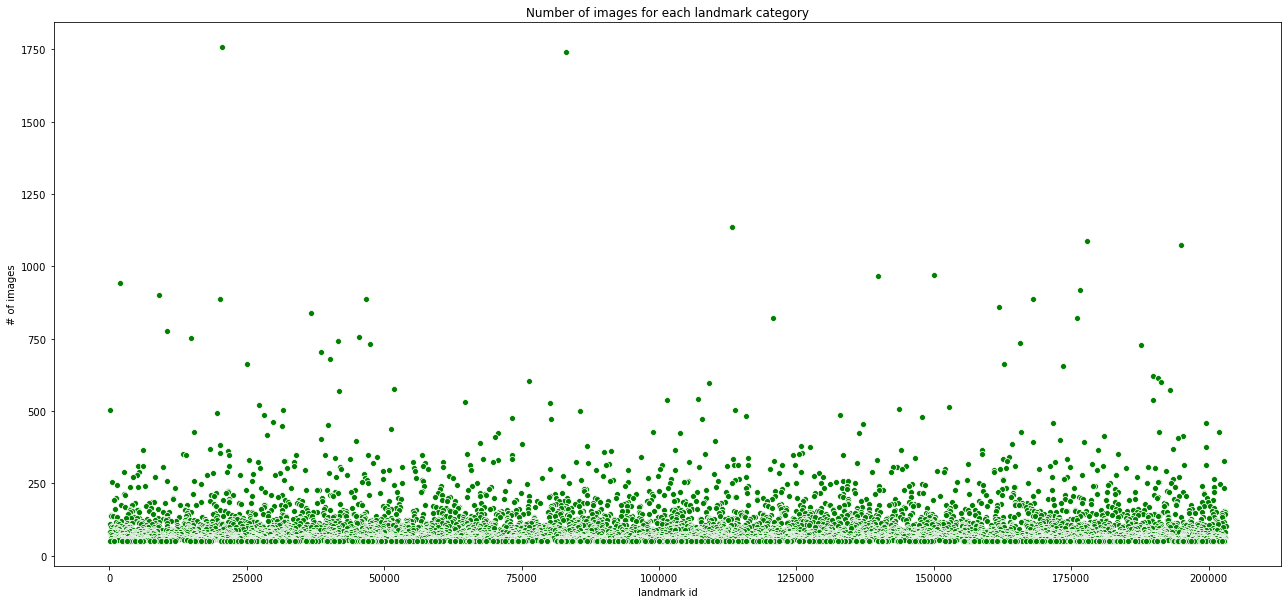

In [55]:

temp = landmarks.landmark_id.value_counts().to_frame()
temp.reset_index(inplace=True)
temp.columns=['landmark_id','count']

plt.figure(figsize=(22,10))
sns.scatterplot(x='landmark_id', y='count', data=temp, color = 'green')
plt.ylabel('# of images')
plt.xlabel('landmark id')
plt.title('Number of images for each landmark category')

In [ ]:
landmark = landmarks.landmark_id.value_counts()
landmark_df = pd.DataFrame({'landmark_id':landmark.index, 'frequency':landmark.values}).head(30)

landmark_df['landmark_id'] =   landmark_df.landmark_id.apply(lambda x: f'landmark_id_{x}')

fig = px.bar(landmark_df, x="frequency", y="landmark_id",color='landmark_id', orientation='h',
             hover_data=["landmark_id", "frequency"],
             height=1000,
             title='Number of images per landmark_id (Top 30 landmark_ids)')
fig.show()

In [ ]:
# to make new folders for each class. The section of code will read all the unique landmarks left-over and will create an empty folder with tha same name as that of the landmark.

for i in list(count["landmark"]):
    cmd = 'mkdir' + path + str(i)
    os.system(cmd)

In [ ]:
# to change the directry of all the sected images. shifting it from default location to newly created folders to segregate on the basis of landmark id.

# n=0
# mkdir path/to/new_directory/
for ind in landmarks.index:
#     n+=1
    image_path = landmarks["id"][ind]
    landmark_name = landmarks["landmark_id"][ind]
    f1,f2,f3 = image_path[0],image_path[1],image_path[2]
#     img_name = image_path[3:]
    path = "../input/landmark-recognition-2020/train/" +f1 + "/" + f2 + "/" + f3 + "/" + image_path + ".jpg"
    newpath = "../output/ndata/" + landmark_name + image_path + ".jpg"
    cmd = 'move' + path + newpath
    os.system(cmd)
